In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import folium


Bad key "'font.family" on line 623 in
C:\Users\seoyu\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
shop_2018 = pd.read_csv('data/commercial_store/소상공인시장진흥공단_상가업소정보_201806_01.csv',
                       encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [4]:
shop_2018.shape

(476183, 39)

In [5]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [6]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 상호명으로 봤을 때 커피점이 13472개 있다
# 그러나 상호명이 공통된것 이 있다
coffee['상호명'].unique().shape

(13472,)

In [8]:
coffee['상호명'].value_counts()

이디야커피              459
스타벅스               308
간단하지만특별한화피디Cafe    191
투썸플레이스             129
커피빈                125
                  ... 
쥬씨중계브라운스톤점           1
로로테이블                1
합동휴게실                1
오롯이카페                1
삼백커피오륜점              1
Name: 상호명, Length: 13472, dtype: int64

In [9]:
coffee[coffee['상호명'] == '스타벅스']
coffee.loc[coffee['상호명'] == '스타벅스','상호명']
coffee.loc[coffee['상호명'] == '스타벅스','상호명'].unique()

array(['스타벅스'], dtype=object)

In [10]:
#.str.contains을 이용해 살펴보면 상호명에 지점명이 같이 들어가는 경우가 있다
coffee.loc[coffee['상호명'].str.contains('스타벅스'),'상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스부산서면', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점',
       '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트',
       '스타벅스구로하이엔드점', '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점',
       '스타

In [11]:
coffee['시도명'].isnull().sum()

0

In [12]:
coffee['시도명'].value_counts()

서울특별시    14662
부산광역시     4097
Name: 시도명, dtype: int64

In [13]:
coffee['시군구명'].unique()

array(['연제구', '강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '종로구', '도봉구',
       '마포구', '광진구', '기장군', '남구', '서대문구', '은평구', '양천구', '해운대구', '관악구',
       '성동구', '송파구', '금천구', '사상구', '동대문구', '강서구', '금정구', '동작구', '중랑구',
       '강동구', '사하구', '북구', '용산구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [14]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    18759
Name: 상권업종중분류명, dtype: int64

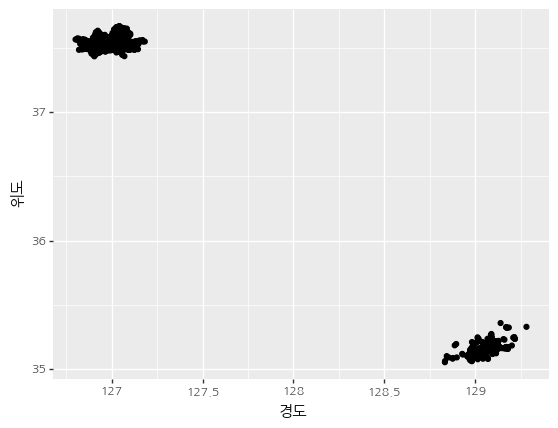

<ggplot: (-9223371940745448076)>

In [15]:
(ggplot(shop_2018[:1000])
 + aes(x = '경도', y = '위도')
 + geom_point()
 + theme(text=element_text(family='NanumGothic'))

)

In [16]:
seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
seoul.shape

(330089, 39)

In [17]:
 seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

In [18]:
# seoul.describe()
# obiect type에 대한 정보를 보기 위해서는 옵션이 필요하다
seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,330089,44233,330089,330089,330089,330089,330089,330089,311001,311001,...,330089,330089,330089,330089,330089,153589,330089,24973,232504,46614
unique,233567,15087,9,9,94,94,686,686,210,210,...,465,2,124181,11861,124735,25179,123973,914,115,2494
top,CU,본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,신림동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1450,294,109766,109766,35778,35778,23721,23721,43878,43878,...,6759,329735,976,2352,1008,1011,995,4307,161124,5469


In [19]:
seoul[['위도', '경도']].describe(include=np.number)
# 평균값을 이용해 지도를 불러올때 중심위치를 설정한다

,위도,경도
count,330089.000000,330089.000000
mean,37.545992,126.994943
std,0.049406,0.081294
min,37.434081,126.768169
25%,37.505306,126.925013
50%,37.543243,127.009046
75%,37.574720,127.055651
max,37.692398,127.182588


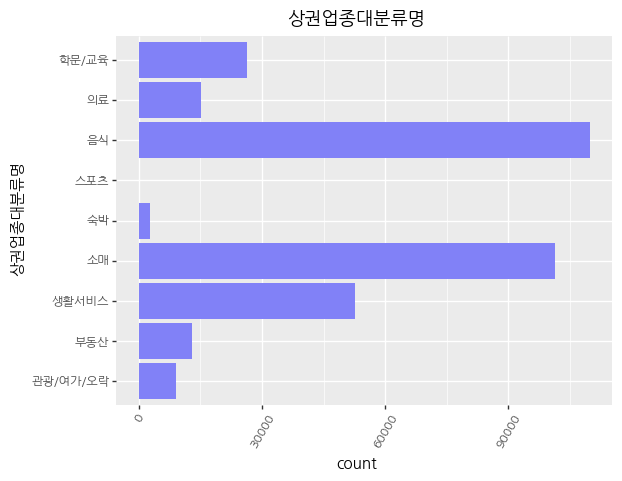

<ggplot: (-9223371940744211726)>

In [20]:
# 상권업종 대분류명에 따른 barplot
(ggplot(seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + coord_flip()
 + theme(text=element_text(family='NanumGothic'),
        axis_text_x=element_text(rotation=60))
)

*  음식점이 가장 많으며, 소매, 생활서비스, 학문/교육 순으로 상권이 많은것을 알 수 있다

### 음식점에 대한 데이터 분석

In [21]:
seoul_food = seoul.loc[seoul['상권업종대분류명'].str.contains('음식')]
seoul_food.shape

(109766, 39)

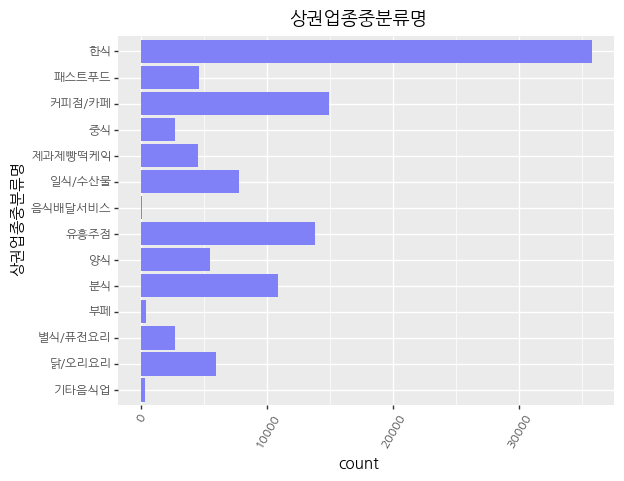

<ggplot: (96110573765)>

In [22]:
(ggplot(seoul_food)
 + aes('상권업종중분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종중분류명')
 + coord_flip() #가로
 + theme(text=element_text(family='NanumGothic'),
        axis_text_x=element_text(rotation=60))
)

In [23]:
fast_food = seoul_food.loc[seoul_food['상권업종중분류명'] == '패스트푸드']
fast_food.shape

(4605, 39)

In [24]:
fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '배스킨라빈스', ..., '브리웰', '베이크럽', '델리'], dtype=object)

## 배스킨라빈스와 던킨도너츠의 입지분석

In [25]:
br_31 = seoul.loc[seoul['상호명'].str.contains('배스킨|던킨')].copy()
br_31.shape

(438, 39)

In [26]:
br_31 = br_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
               '지번주소', '도로명주소', '위도', '경도', '시군구명', '행정동명']].copy()

br_31.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [27]:
br_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
63,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동
1564,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동
1921,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동
1958,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동
2459,던킨도너츠,잠실본동점,음식,패스트푸드,서울특별시 송파구 잠실동 242-9,서울특별시 송파구 석촌호수로 118,37.507431,127.090005,송파구,잠실본동


In [28]:
br_31['상호명'].value_counts()

배스킨라빈스31           102
던킨도너츠               86
배스킨라빈스              44
던킨도넛                 4
비알코리아던킨도너츠동부         1
                  ... 
던킨도너츠오목교점            1
배스킨라빈스31미아역점         1
배스킨라빈스31신내홈플러스점      1
성북역맞이방던킨도너츠          1
배스킨라빈스31중계은행점        1
Name: 상호명, Length: 206, dtype: int64

* 상호명에는 브랜드명과 지점명이 함께 있으므로 '브랜드명'value에 각각의 브랜드명을 넣어준다

In [29]:
br_31['브랜드명'] = ''

In [30]:
br_31.loc[br_31['상호명'].str.contains('배스킨'), '브랜드명'] ='배스킨라빈스'
br_31.loc[br_31['상호명'].str.contains('던킨'), '브랜드명'] ='던킨'

In [31]:
br_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
63,배스킨라빈스,배스킨라빈스
1564,던킨도너츠테크노마트점,던킨
1921,던킨도너츠창동하나로,던킨
1958,던킨도너츠용산민자역사2호,던킨
2459,던킨도너츠,던킨


In [32]:
group_count = br_31['브랜드명'].value_counts()
group_count

배스킨라빈스    290
던킨        148
Name: 브랜드명, dtype: int64

In [37]:
ratio = group_count[0] / group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배 가량 많습니다.'.format(ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 1.96배 가량 많습니다.


In [38]:
br_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 63 to 476000
Data columns (total 11 columns):
상호명         438 non-null object
지점명         369 non-null object
상권업종대분류명    438 non-null object
상권업종중분류명    438 non-null object
지번주소        438 non-null object
도로명주소       438 non-null object
위도          438 non-null float64
경도          438 non-null float64
시군구명        438 non-null object
행정동명        438 non-null object
브랜드명        438 non-null object
dtypes: float64(2), object(9)
memory usage: 41.1+ KB


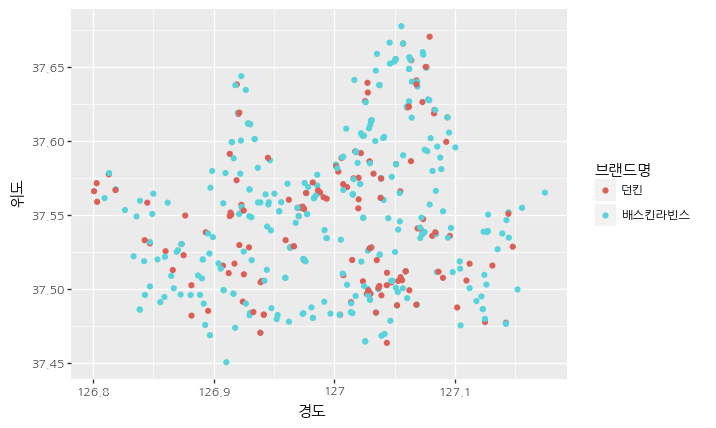

<ggplot: (-9223371940744196429)>

In [39]:
(ggplot(br_31)
 + aes(x = '경도', y = '위도', color='브랜드명')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')

)

### Folium 사용예제

In [ ]:
folium.CircleMarker?

In [55]:
geo_df = br_31.copy()

#지도를 초기화 해줄 때 중심의 위치를 설정한다
# 사용자가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균갑을 구해온다

map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()],
                            zoom_start = 12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정 (popup_name)
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    
    # 브랜드명에 따라 아이콘 생상을 달리 해 찍어준다(icon_color)
    if geo_df['브랜드명'][n] == '배스킨라빈스' :
        icon_color = 'blue'
    else:
        icon_color = 'pink'
    
    folium.Marker(
        [geo_df['위도'][n], geo_df['경도'][n]],
        popup = popup_name,
        icon = folium.Icon(color = icon_color)).add_to(map)    
                   
map

In [56]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '배스킨라빈스' :
        icon_color = 'blue'
    else:
        icon_color = 'pink'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 뚜레쥬르, 파리바게뜨 매장 위치 분석

In [45]:
# 파리바게뜨는 파리크라상으로 되어 있는 곳도 있기때문에 바게트와 크라상 모두 포함한다
# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌는 제외한다
df_bread = seoul.loc[
    seoul['상호명'].str.contains('뚜레쥬르|파리(바게|크라상)') &
    (~seoul['상호명'].str.contains('파스쿠찌|잠바주스'))
].copy()
df_bread.shape

(628, 39)

In [46]:
df_bread['상호명'].value_counts()

파리바게뜨           199
뚜레쥬르            122
파리크라상            11
파리바게뜨카페대학로점       2
파리바게뜨월계미성         2
               ... 
뚜레쥬르카페대치점         1
파리바게뜨청담사거리        1
파리바게뜨서강신수점        1
뚜레쥬르성내3동          1
파리바게뜨신길돈보스코점      1
Name: 상호명, Length: 295, dtype: int64

In [48]:
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라상)'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'

In [49]:
bread_group_count = df_bread['브랜드명'].value_counts()
bread_group_count

파리바게뜨    434
뚜레쥬르     194
Name: 브랜드명, dtype: int64

In [50]:
bread_ratio = bread_group_count[0] / bread_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 {0:.2f}배 가량 많습니다'.format(bread_ratio))

제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 2.24배 가량 많습니다


* 실제 매장의 수에는 차이가 있을 수 있다.

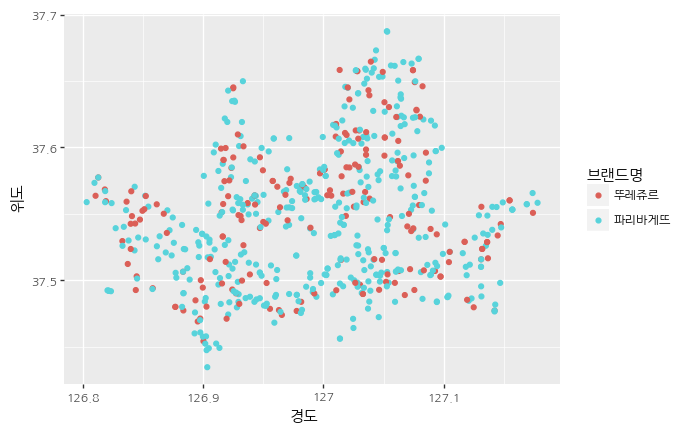

<ggplot: (-9223371940742383535)>

In [52]:
(ggplot(df_bread)
 + aes(x = '경도', y = '위도', color = '브랜드명')
 + geom_point()
 + theme(text = element_text(family = 'NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

In [53]:
geo_df = df_bread.copy()

#지도를 초기화 해줄 때 중심의 위치를 설정한다
# 사용자가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균갑을 구해온다

map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()],
                            zoom_start = 12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정 (popup_name)
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    
    # 브랜드명에 따라 아이콘 생상을 달리 해 찍어준다(icon_color)
    if geo_df['브랜드명'][n] == '파리바게뜨' :
        icon_color = 'blue'
    else:
        icon_color = 'green'
    
    folium.Marker(
        [geo_df['위도'][n], geo_df['경도'][n]],
        popup = popup_name,
        icon = folium.Icon(color = icon_color)).add_to(map)    
                   
map

In [54]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

### 공차매장 입지분석 (그냥 내가 보고싶은 공차지도)

In [61]:
seoul_gongcha = seoul.loc[seoul['상호명'].str.contains('공차')].copy()
seoul_gongcha.shape

(118, 39)

In [63]:
seoul_gongcha['상호명'].value_counts()

공차              72
공차명동점            1
공차트윈시티점          1
공차강남교보타워점        1
공차신림역점           1
공차구로디지털점         1
공차성수성원점          1
코레일유통공차코리아       1
공차GONGCHA        1
공차홈플러스영등포점       1
공차경찰병원역점         1
공차광운대점           1
공차석계역점           1
공차코리아대치점         1
공차가산디지털단지점       1
공차건대점            1
공차구로디지털2호점       1
공차국악고점           1
아이닛시/공차시         1
아이드라이브공차         1
공차바로             1
공차중앙대점           1
공차올림픽공원점         1
공차롯데미아점          1
공차고척스카이돔점        1
공차고대안암병원점        1
공차명일역점           1
공차화곡역점           1
압구정로데오공차         1
공차남부터미널점         1
공차광화문점           1
공차현대천호점팝업스토어     1
공차신촌연세로점         1
공차현대백화점신촌점       1
공차현대아울렛가산점       1
공차보라매점           1
공차서촌점            1
공차북경고려학원점        1
공차여의도순복음점        1
공차어린이대공원역점       1
공차압구정로데오점        1
공차양재본점           1
공차롯데백화점청량리점      1
공차교대점            1
공차한양대점           1
공차영등포구청점         1
태성자공차공업사         1
Name: 상호명, dtype: int64

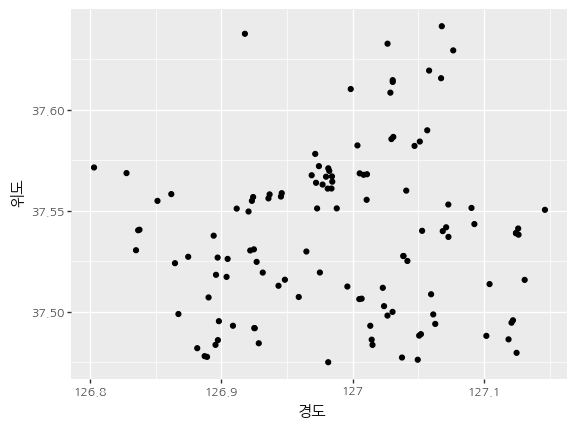

<ggplot: (96137873570)>

In [66]:
(ggplot(seoul_gongcha)
 + aes(x = '경도', y = '위도')
 + geom_point()
 + theme(text = element_text(family = 'NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

In [67]:
geo_df = seoul_gongcha.copy()

#지도를 초기화 해줄 때 중심의 위치를 설정한다
# 사용자가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균갑을 구해온다

map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()],
                            zoom_start = 12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정 (popup_name)
    popup_name = geo_df['상호명'][n] + ' - ' + geo_df['도로명주소'][n]
    
    # 브랜드명에 따라 아이콘 생상을 달리 해 찍어준다(icon_color)

    folium.Marker(
        [geo_df['위도'][n], geo_df['경도'][n]],
        popup = popup_name,
        icon = folium.Icon(color = 'red')).add_to(map)    
                   
map